# ADIA Training
# Module: Unsupervised Learning
# Geographical Clustering, Profiling

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Geographical Clustering 

<div class="alert alert-block alert-warning">
The goal in this part is to caracterize the urban space of Paris wrt to the  kind of Points of Interest (POIs). By doing a clustering on the distribution of POIs, we can outlight regions that are the most similar.</div>

### 1- Data preparation

<div class="alert alert-block alert-warning">
The dataset  contains Points of interest (POIs) in Paris, scrapped using the API of google map. The file is in <code>csv</code> format, each line corresponds to a POI and the dimension indicates the geographical localisation of the POI, the kind of POI (restaurant, cafe, ...) and sometime a score and  a price level indication.
</div>


<div class="alert alert-block alert-info">
The following block allows to load the limits of the districts of Paris <code>'districts-paris.csv'</code>. It helps to visualize the informations.
</div>

In [3]:
table_poi = pd.read_csv('poi-paris.csv')
districts=pd.read_csv('districts-paris.csv', sep = ',')
districts['bounds'] = districts['bounds'].apply(eval)
#  Draw the districts
def draw_districts():
    for x in districts['bounds']:
        plt.plot([c[0] for c in x], [c[1] for c in x], color = 'black')

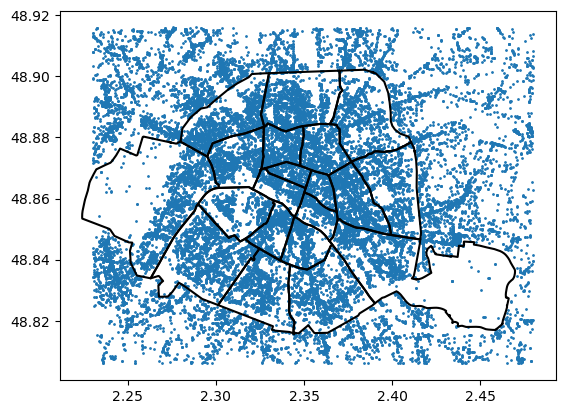

In [4]:
plt.scatter(table_poi["longitude"],table_poi['latitude'],s=1)
draw_districts()

<div class="alert alert-block alert-info">
Let's look at the content of the table: display the global information of the table, the 10 first lines and the 10 last lines
</div>

In [ ]:
#[STUDENT]

<div class = "alert alert-block alert-info">
    Count for each column the number of unique values
</div>

In [ ]:
#[STUDENT]

<div class = "alert alert-block alert-info">
    Compute the number of POIs of each type. Are the types exclusives ?
</div>

In [ ]:
#[STUDENT]

<div class = "alert alert-block alert-info">
How to compute the couple of type arising the most frequently ? 
</div>

In [ ]:
#[STUDENT]

### 2 - Manual Space discretization

<div class="alert alert-block alert-warning">
A first way to do the discretization of the space is to consider a regular grid. To know the assignement of each POI to a cell, we need to compute the coordinates  $(i,j)$ of  the cell from the GPS  longitude and latitude of the POI. If we consider a regular discretization of size
$N*N$, the formula is the following : $i=\lfloor N*\frac{(longitude-lomin)}{(lomax-lomin)}\rfloor$ and $j = \lfloor N*\frac{(latitude - lamin)}{(lamax-lamin)} \rfloor$ , with $\lfloor x\rfloor$ the integer part of $x$, $lamin,lamax$ the minimal and maximal latitude, $lomin,lomax$ the  minimal et maximal longitude.
</div>

In [ ]:
lomax, lomin, lamax, lamin = table_poi.longitude.max(), table_poi.longitude.min(), table_poi.latitude.max(), table_poi.latitude.min()
N = 15
lomax, lomin, lamax, lamin, N

<div class="alert alert-block alert-info">
Write the functions<code>get_j(lat)</code> and <code>get_i(long)</code> which compute the coordinates i and j  wrt the latitude and the longitude.
You can use <code>np.int32</code> to compute the integer part. 
</div>

<div class="alert alert-block alert-info">
Add to the table <code>table_poi</code> two columns  <code>i</code> and <code>j</code> corresonding to the discretize coordinates of the POIs.
</div>

<div class="alert alert-block alert-warning">
The following block allows to draw the discrete space: <code>tab20</code> is a  <em>colormap</em>, a list of 20 colors which is used to assign a color to each cell.
</div>

In [ ]:
tab20 = plt.get_cmap('tab20')
_ = plt.scatter(table_poi['longitude'], table_poi['latitude'], c = [x % tab20.N for x in N * table_poi['i'] + table_poi['j']], s = 1, cmap = tab20)


### 4 - Clustering and analyse

<div class="alert alert-block alert-warning">
Most of clustering algorithms can be found <em>sklearn.cluster</em> module, especially K-means (<em>KMeans</em>).  You can fix the number of clusters with the parameter <em>n_clusters</em>. KMeans have a method <em>fit(data)</em> to estimate the model.
</div>

<div class="alert alert-block alert-info">
    We can now compute the description of each cell by calculating the distribution of POIs types in each cell:
    each of the $N*N$ cell is an <em>example</em> and its description will be the distribution of the types (number of dimensions = number of types).
   Use the groupby function of pandas to compute the number of each kind of POIs for each cell. 
    <br>Compute a K-means clustering 
</div>

<div class="alert alert-block alert-info">
    The following code allows to draw the cells with a color depending on the cluster belonging.
    It uses the method <em>KMeans.predict(data)</em> to assign a cluster to each sample of data.
    </br>
    <em>Remarks</em>: the method <em>KMeans.fit_predict</em> allows to compute the clustering and to return the computed assignement for each example. 
    </br>
    </br>
    Replace the line to complete in order to retrieve the color of cell and observe your clustering.
</div>

In [ ]:
from matplotlib.patches import Rectangle
_ = plt.scatter(table_poi["longitude"],table_poi['latitude'],s=0.1)
draw_districts()
for i in range(N):
    for j in range(N):
        x = lomin + (lomax - lomin) * i / N
        y = lamin + (lamax - lamin) * j / N
        c = pass # Complete with the color of cell (i,j)
        _ = plt.gca().add_patch(Rectangle((x, y), (lomax - lomin) / N, (lamax - lamin) / N, color = c, alpha = 0.5))



<div class="alert alert-block alert-info">
To analyze the clusters, we can display the distribution of the POI types associated to each cluster (the centroid of each cluster).
    </br>
    The centroids are all stored in the attribute <em>cluster_centers_</em> of the model.
Look at the results. Try with more or less number of clusters, with different step size of discretization.
</div>

In [ ]:
fig, axs = plt.subplots(len(km.cluster_centers_)//2, 2, sharey=True,sharex=True)
for i,k in enumerate(km.cluster_centers_):
    axs.flatten()[i].bar(range(len(k)),k,color=tab20.colors[i])
    axs.flatten()[i].set_xticks(range(len(k)))
    axs.flatten()[i].set_xticklabels(types,rotation="vertical")

<div class="alert alert-block alert-info">
The elbow score of the model is stored in the <em>inertia_</em> attribute of the model. Draw the elbow curve and analyse it to find the best number of clusters.
    </div>

## 5-  K-Means for spatial clustering

<div class="alert alert-block alert-warning">
    To obtain more homogenous clusters, we have to partition the space less naivly than the simple regular grid discretization.
    We can use for that also the  $K$-means algorithm, by clusterizing the coordinates of the POIs (what it is called <em>quantization</em>).
    </br>
    Compute the spatial K-mean clustering  and store the result in a new column <em>geo_cluster</em> of <em>table_poi></em> indicating the spatial cluster assignement of each POI. 
</div>

In [ ]:
K_GEO=100
km_spatial = KMeans(n_clusters=K_GEO,n_init='auto')

<div class="alert alert-block alert-info">
Plot the result to draw with a color depending on the spatial clustering each of the POIs. Plot the centroid of each cluster.
</div>


<div class="alert alert-block alert-info">
 Create an array  <code>geo_cell_dist</code> of size <code>K_GEO</code> in the same way as above. Fill this array with the distribution of POIs types for each spatial cluster.
</div>    

<div class="alert alert-block alert-info">
 Compute a K-means clustering and draw the results</div>

<div class="alert alert-block alert-info">
 Do the same analysis as before concerning the centroids. Examine the Elbow curve. What difference ? </div>